# MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
### Seção 2.5: Propriedades da DFT

## Seção 2.5.1: Formulação matricial e linearidade

Vamos mostrar que DFT(x) pode ser expressa como um produto matriz-vetor da forma $DFT(x)=Fx$. Para isso considere um exemplo em $\mathbb{C}^4$. Temos
$$x=\left[\begin{array}{c}x_0\\x_1\\x_2\\x_3\end{array}\right]\quad
\mbox{e}\quad
X_k = (x,E_k) = \sum_{n=0}^3x_ne^{-i2\pi kn/N} = E_k^*x,$$
onde $E_k^*$ é a transposta conjugada do vetor $E_k$:
$$E_k^* = \left[ \overline{(E_k)_0}\quad \overline{(E_k)_1}\quad \overline{(E_k)_2}\quad \overline{(E_k)_3} \right].$$

Portanto
$$X_0 = [ \overline{1}\quad \overline{1}\quad \overline{1}\quad \overline{1} ]\left[\begin{array}{c}x_0\\x_1\\x_2\\x_3\end{array}\right]\quad
X_1 = [ \overline{1}\quad \overline{i}\quad \overline{-1}\quad \overline{-i} ]\left[\begin{array}{c}x_0\\x_1\\x_2\\x_3\end{array}\right]$$

$$X_2 = [ \overline{1}\quad \overline{-1}\quad \overline{1}\quad \overline{-1} ]\left[\begin{array}{c}x_0\\x_1\\x_2\\x_3\end{array}\right]\quad
X_3 = [ \overline{1}\quad \overline{-i}\quad \overline{-1}\quad \overline{i} ]\left[\begin{array}{c}x_0\\x_1\\x_2\\x_3\end{array}\right]$$

Em forma matricial
$$\left[\begin{array}{c}X_0\\X_1\\X_2\\X_3\end{array}\right] =
\left[\begin{array}{rrrr}
1&1&1&1\\
1&-i&-1&i\\
1&-1&1&-1\\
1&i&-1&-i
\end{array}\right]\left[\begin{array}{c}x_0\\x_1\\x_2\\x_3\end{array}\right]$$

In [29]:
import numpy as np
import math
from scipy import fft

# agora xn é um vetor de coluna, deve ser um ndarray
def dft_m1(xn):
    N = len(xn)
    t = np.linspace(0, 1, N, endpoint=False)
    k = np.arange(0,N,1).reshape((N,1))
    F = np.exp(-1j*2*math.pi*t*k)
    print(f'F.shape={F.shape}')
    xn_column_vector = xn.reshape((N,1))
    Xk = np.matmul(F, xn_column_vector)
    return Xk.flatten()

def dft_m2(xn):
    N = len(xn)
    ns = np.arange(0,N,1)
    indices = ns.reshape((N,1)) * ns
    #print(indices)
    F = np.exp(-1j*2*math.pi/N*indices)
    xn_column_vector = xn.reshape((N,1))
    Xk = np.matmul(F, xn_column_vector)
    return Xk.flatten()

# igual a implemenação do notebook passado mas com a geração das bases com o que aprendi nessa seção
def dft3(xn):
    N = len(xn)
    ns = np.arange(0,N,1)
    indices = ns.reshape((N,1)) * ns
    print(indices)
    Enk = np.exp(-1j*2*math.pi/N*indices)
    Xk = np.inner(xn, Enk)
    return Xk
    
def test_dft_m1(N):
    xn = np.random.randn(N)
    dut = dft_m1(xn)
    golden = np.fft.fft(xn)
    #print(np.round(dut))
    #print(np.round(golden))
    assert np.allclose(dut, golden) == True, 'Erro, não está batendo'
    print('Teste OK')
    
def test_dft_m2(N):
    xn = np.random.randn(N)
    dut = dft_m2(xn)
    golden = np.fft.fft(xn)
    #print(np.round(dut))
    #print(np.round(golden))
    assert np.allclose(dut, golden) == True, 'Erro, não está batendo'
    print('Teste OK')

    
def test_dft3(N):
    xn = np.random.randn(N)
    dut = dft3(xn)
    golden = np.fft.fft(xn)
    #print(np.round(dut))
    #print(np.round(golden))
    assert np.allclose(dut, golden) == True, 'Erro, não está batendo'
    print('Teste OK')    

test_dft3(4)

[[0 0 0 0]
 [0 1 2 3]
 [0 2 4 6]
 [0 3 6 9]]
Teste OK


In [10]:
# np.arange(0,4,1)
np.linspace(0,1,4, endpoint=False)

array([0.  , 0.25, 0.5 , 0.75])

In [92]:
# changed np.conjugate(F) to the hermitian transpose .H
def idft_m2(Xk):
    N = len(Xk)
    ns = np.arange(0,N,1)
    indices = ns.reshape((N,1)) * ns
    #print(indices)
    F = np.exp(-1j*2*math.pi/N*indices)
    # F_inv = 1/N * np.conjugate(F)
    F_inv = 1/N * np.matrix(F).H
    Xk_column_vector = Xk.reshape((N,1))
    xn = np.matmul(F_inv, Xk_column_vector)
    return xn.flatten()

def test_idft_m2(N):
    Xk = np.random.randn(N)
    dut = idft_m2(Xk)
    golden = np.fft.ifft(Xk)
    #print(np.round(dut))
    #print(np.round(golden))
    assert np.allclose(dut, golden) == True, 'Erro, não está batendo'
    print('Teste OK')

test_idft_m2(4000)

Teste OK


In [45]:
def dft1(xn):
    N = len(xn)
    t = np.linspace(0,1,N, endpoint=False)
    k = np.arange(0,N,1).reshape((N,1))
    Xk = np.inner(xn, np.exp(-1j*2*math.pi*t*k))
    return Xk



Teste OK


Observe que a matriz 
$$F=\left[\begin{array}{rrrr}
1&1&1&1\\
1&-i&-1&i\\
1&-1&1&-1\\
1&i&-1&-i
\end{array}\right]$$
tem as linhas indexadas por $k$ (a frequência associada ao coeficiente $X_k$) e as colunas indexadas por $n$ (o índice da amostra que multiplicará o $x_n$), e assim a entrada associada à posição $(k,n)$ será
$$F_{k,n} = (E_k^*)_n = \overline{(E_k)_n} = e^{-i2\pi kn/N}.$$

### Teorema 2.1
Seja $x\in\mathbb{C}^N$ e $X=DFT(x)$. Então $X=Fx$ onde $F\in\mathbb{C}^{N\times N}$ tal que $F_{k,n} = e^{-i2\pi kn/N}$.

Denotando por $z=e^{-i2\pi/N}$, temos $F_{k,n} = e^{-i2\pi kn/N} = z^{kn}$, e a matriz $F$ será:
$$\left[\begin{array}{llllll}
1&1&1&1&\cdots&1\\
1&z&z^2&z^3&\cdots&z^{N-1}\\
1&z^2&z^4&z^6&\cdots&z^{2(N-1)}\\
1&z^3&z^6&z^9&\cdots&z^{3(N-1)}\\
\vdots&\vdots&\vdots&\vdots&\ddots&\vdots\\
1&z^{N-1}&z^{2(N-1)}&z^{3(N-1)}&\cdots&z^{(N-1)(N-1)}
\end{array}\right]$$

Note que $F$ é simétrica (pois $F_{n,k} = z^{nk} = z^{kn} = F_{k,n}$), além de várias outras propriedades que iremos explorar.

Para ver que a IDFT também pode ser expressa matricialmente, considere outra vez o exemplo em $\mathbb{C}^4$, onde $x=\frac{1}{N}\sum_{k=0}^{N-1}X_kE_k$. Então
$$\begin{array}{ll}
x & = \frac{1}{N}\left(X_0\left[\begin{array}{c}(E_0)_0\\(E_0)_1\\(E_0)_2\\(E_0)_3\end{array}\right]+
X_1\left[\begin{array}{c}(E_1)_0\\(E_1)_1\\(E_1)_2\\(E_1)_3\end{array}\right]+
X_2\left[\begin{array}{c}(E_2)_0\\(E_2)_1\\(E_2)_2\\(E_2)_3\end{array}\right]+
X_3\left[\begin{array}{c}(E_3)_0\\(E_3)_1\\(E_3)_2\\(E_3)_3\end{array}\right]
\right)\\
& = \frac{1}{N}\left[\begin{array}{rrrr}
(E_0)_0&(E_1)_0&(E_2)_0&(E_3)_0\\
(E_0)_1&(E_1)_1&(E_2)_1&(E_3)_1\\
(E_0)_2&(E_1)_2&(E_2)_2&(E_3)_2\\
(E_0)_3&(E_1)_3&(E_2)_3&(E_3)_3
\end{array}\right]
\left[\begin{array}{c}X_0\\X_1\\X_2\\X_3\end{array}\right],
\end{array}$$
ou seja, $x=\tilde{F}X$ onde $\tilde{F}_{n,k} = \frac{1}{N}(E_k)_n = \frac{1}{N}e^{i2\pi kn/N} = \frac{1}{N}z^{-kn} = \frac{1}{N}\overline{F_{k,n}}$.

**Observe a troca dos índices:** as linhas de $\tilde{F}$ são indexadas por $n$ (índice temporal) e as colunas de $\tilde{F}$ são indexadas por $k$ (índice espectral).

### Teorema 2.2
Seja $x\in\mathbb{C}^N$ e $X=DFT(x)$. Então
$$X=Fx$$
$$x=\tilde{F}X$$
onde, denotando por $z=e^{-i2\pi/N}$,
$$F_{k,n} = e^{-i2\pi kn/N} = z^{kn}$$
$$\tilde{F}_{n,k} = \frac{1}{N}e^{i2\pi kn/N} = \frac{1}{N}z^{-nk}.$$
Além disso,
$$\tilde{F} = F^{-1} = \frac{1}{N}F^*$$
onde $*$ denota a matriz Hermitiana de $F$, que é a matriz transposta e conjugada.

### Teorema 2.3
A $DFT:\mathbb{C}^N\mapsto\mathbb{C}^N$ é uma operação linear, ou seja, para quaisquer $x,y\in\mathbb{C}^N$ e $a,b\in\mathbb{C}$, vale
$$DFT(ax+by) = aDFT(x)+bDFT(y).$$
Analogamente, a IDFT também é uma operação linear.

**Prova:** Usando a representação matricial,
$$\begin{array}{ll}
DFT(ax+by) & = F(ax+by)\\
& = aFx+bFy = aDFT(x)+bDFT(y),\end{array}$$
onde a segunda igualdade segue da distributividade do produto de matrizes.

In [27]:
def teste_linearidade(N=10):
    x = np.random.randn(N)
    y = np.random.randn(N)
    a = 5
    b = 4
    assert np.allclose( dft3(a*x + b*y), a*dft3(x) + b*dft3(y)), "Ih, será que é mesmo"
    print("É sim")
    
teste_linearidade(10000)

É sim


## Seção 2.5.2: Simetrias para sinais reais

### Proposição 2.1

Um sinal $x\in\mathbb{C}^N$ possui todas as suas componentes **reais** se, e somente se, sua DFT $X$ satisfaz
$$X_{-k} = \overline{X_k},\ \forall k\in\mathbb{Z},$$
ou equivalentemente, na representação Cartesiana
$$\Re(X_{-k}) = \Re(X_k)\quad\quad\mbox{e}\quad\quad\Im(X_{-k}) = -\Im(X_k),$$
e na representação polar
$$|X_{-k}| = |X_k|\quad\quad\mbox{e}\quad\quad\measuredangle X_{-k} = -\measuredangle X_k.$$

**Prova ($\implies$ ou "somente se"):** Suponha inicialmente que todas as componentes de $x$ são reais, ou seja, que $\overline{x_n} = x_n$. Então
$$\begin{array}{ll}
X_{-k} & = \displaystyle\sum_{n=0}^{N-1}x_ne^{-i2\pi(-k)n/N}\\
 & = \displaystyle\sum_{n=0}^{N-1}\overline{x_n}\overline{e^{-i2\pi kn/N}}\\
 & = \displaystyle\overline{\sum_{n=0}^{N-1}x_ne^{-i2\pi kn/N}}\\
 & = \overline{X_k}.\end{array}$$

**Prova ($\impliedby$ ou "se"):** Por outro lado, supondo que $X_{-k} = \overline{X_k},\ \forall k$, temos
$$\begin{array}{lll}
x_n & = \displaystyle\frac{1}{N}\sum_{k=0}^{N-1}X_ke^{i2\pi kn/N}
& = \displaystyle\frac{1}{N}\sum_{k=0}^{N-1}\overline{X_{-k}}\overline{e^{i2\pi(-k)n/N}}\\
 & = \displaystyle\overline{\frac{1}{N}\sum_{k=0}^{N-1}X_{-k}e^{i2\pi(-k)n/N}}
 & {{\scriptstyle -k\mapsto l}\atop {\large =} } \quad\displaystyle\overline{\frac{1}{N}\sum_{l=0}^{-(N-1)}X_{l}e^{i2\pi ln/N}}\\
 & = \displaystyle\overline{\frac{1}{N}\sum_{l=0}^{N-1}X_{l}e^{i2\pi ln/N}}
 & = \overline{x_n},\end{array}$$
onde a penúltima passagem usa a periodicidade de $X_l$ e $e^{i2\pi ln/N}$ (detalhamento a seguir).

A periodicidade de $X_l$ e $e^{i2\pi ln/N}$ explica aquela passagem pois qualquer soma de $N$ elementos consecutivos de expressões periódicas com período $N$ tem sempre o mesmo resultado:
$$\begin{array}{ll}\displaystyle\sum_{l=0}^{-(N-1)}X_{l}e^{i2\pi ln/N}&=X_{0}e^{i2\pi 0n/N}+X_{-1}e^{i2\pi (-1)n/N}+\ldots+X_{-(N-1)}e^{i2\pi(-N+1)n/N}\\
&= X_{0}e^{i2\pi 0n/N}+X_{-1+N}e^{i2\pi (-1+N)n/N}+\ldots+X_{-(N-1)+N}e^{i2\pi(-N+1+N)n/N}\\
&= X_{0}e^{i2\pi 0n/N}+X_{N-1}e^{i2\pi (N-1)n/N}+\ldots+X_{1}e^{i2\pi(1)n/N}\\
&= \displaystyle\sum_{l=0}^{N-1}X_{l}e^{i2\pi ln/N}.\end{array}$$

### Observação 2.4

Da proposição 2.1, se $x$ é real então $X_{-k}=\overline{X_k}$. Além disso, como $X_k$ é periódico com período $N$, segue que $X_{-k}=X_{N-k}$. Logo
$$X_{N-k} = \overline{X_k}.$$
Em particular, usando $k=\frac{N}{2}+l$, temos que
$$X_{\frac{N}{2}-l} = \overline{X_{\frac{N}{2}+l}},$$
o que explica a simetria conjugada dos espectros de sinais reais em relação à frequência de Nyquist $\left(\frac{N}{2}\right)$:
$$\Re\left(X_{\frac{N}{2}-l}\right) = \Re\left(X_{\frac{N}{2}+l}\right)\quad\quad
\Im\left(X_{\frac{N}{2}-l}\right) = -\Im\left(X_{\frac{N}{2}+l}\right),$$
ou equivalentemente
$$\left|X_{\frac{N}{2}-l}\right| = \left|X_{\frac{N}{2}+l}\right|\quad\quad
\measuredangle X_{\frac{N}{2}-l} = -\measuredangle X_{\frac{N}{2}+l}.$$


## Tentando implementar a DFT/IDFT utilizando multiplicação de matrizes

$$DFT(x_n) = X_k = (x, E_{N,k}), X_k \in \mathbb{C}$$

$$IDFT(X_k) = x_n = \frac{1}{N} (X_k, \overline{E_{N,k}}), x_n \in \mathbb{R} $$




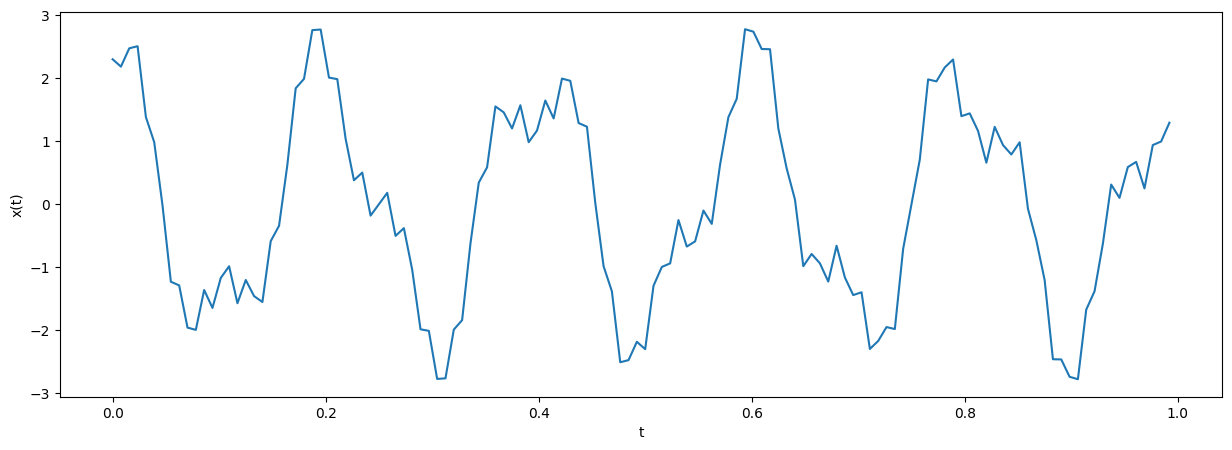

Primeiras 10 amostras do sinal: x[0:10]=[ 2.3    2.183  2.474  2.507  1.383  0.984 -0.023 -1.23  -1.288 -1.958]...


In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import math as m

T = 1; 
N = 128; 
t = np.arange(0, T, 1/N); 
plt.figure(figsize=(15,5))
x = 2*np.cos(2*m.pi*5*t) + 0.8*np.sin(2*m.pi*12*t) + 0.3*np.cos(2*m.pi*47*t)
plt.plot(t,x); 
plt.xlabel("t"); 
plt.ylabel("x(t)");
plt.show()
print("Primeiras 10 amostras do sinal: x[0:10]={}...".format(np.round(x[0:10],3)))

In [23]:
def dft3(x):
    N = len(x)
    t = np.arange(0,1, 1/N)
    k = np.arange(0, N, 1).reshape(N,1)
    Enk = np.exp(1j*2*m.pi*k*t)
    x_col = x.reshape(-1,1)
    return np.dot(np.conjugate(Enk), x_col)

Xk = dft3(x)
ck = Xk / N
print(np.round(ck,2))

[[-0.  +0.j ]
 [-0.  -0.j ]
 [-0.  -0.j ]
 [ 0.  +0.j ]
 [-0.  -0.j ]
 [ 1.  -0.j ]
 [-0.  +0.j ]
 [-0.  -0.j ]
 [-0.  +0.j ]
 [-0.  -0.j ]
 [-0.  -0.j ]
 [-0.  -0.j ]
 [-0.  -0.4j]
 [ 0.  -0.j ]
 [-0.  +0.j ]
 [-0.  +0.j ]
 [-0.  -0.j ]
 [-0.  -0.j ]
 [ 0.  +0.j ]
 [-0.  +0.j ]
 [-0.  -0.j ]
 [-0.  -0.j ]
 [-0.  -0.j ]
 [-0.  -0.j ]
 [ 0.  +0.j ]
 [ 0.  -0.j ]
 [-0.  +0.j ]
 [ 0.  +0.j ]
 [ 0.  +0.j ]
 [-0.  +0.j ]
 [-0.  -0.j ]
 [-0.  +0.j ]
 [-0.  -0.j ]
 [ 0.  -0.j ]
 [ 0.  +0.j ]
 [ 0.  -0.j ]
 [-0.  +0.j ]
 [-0.  +0.j ]
 [ 0.  -0.j ]
 [ 0.  -0.j ]
 [-0.  -0.j ]
 [-0.  -0.j ]
 [-0.  -0.j ]
 [-0.  +0.j ]
 [ 0.  -0.j ]
 [-0.  -0.j ]
 [ 0.  +0.j ]
 [ 0.15+0.j ]
 [-0.  +0.j ]
 [-0.  -0.j ]
 [-0.  -0.j ]
 [-0.  +0.j ]
 [ 0.  +0.j ]
 [ 0.  -0.j ]
 [-0.  -0.j ]
 [-0.  +0.j ]
 [-0.  -0.j ]
 [-0.  -0.j ]
 [-0.  -0.j ]
 [ 0.  -0.j ]
 [-0.  -0.j ]
 [-0.  -0.j ]
 [ 0.  -0.j ]
 [-0.  +0.j ]
 [ 0.  -0.j ]
 [-0.  +0.j ]
 [-0.  +0.j ]
 [-0.  +0.j ]
 [-0.  +0.j ]
 [ 0.  -0.j ]
 [ 0.  +0.j ]
 [ 0. 

In [24]:
for index, value in np.ndenumerate(ck):
    if abs(value) > 1e-8:
        print(f' index={index} , value={np.round(value,2)}, abs={abs(value)}')

 index=(5, 0) , value=(1-0j), abs=1.0000000000000002
 index=(12, 0) , value=(-0-0.4j), abs=0.40000000000000036
 index=(47, 0) , value=(0.15+0j), abs=0.15000000000000102
 index=(81, 0) , value=(0.15+0j), abs=0.14999999999999927
 index=(116, 0) , value=0.4j, abs=0.3999999999999975
 index=(123, 0) , value=(1+0j), abs=1.000000000000001


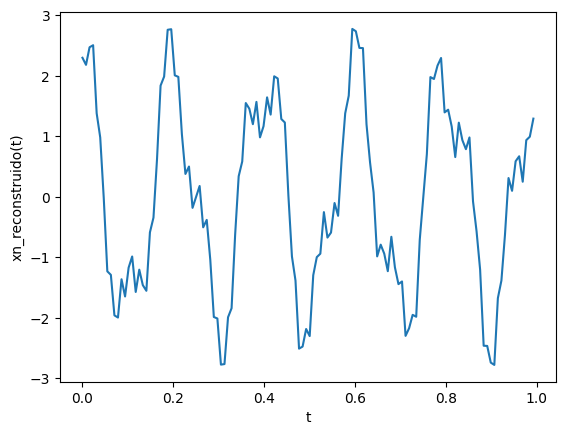

In [28]:
def idft(Xk):
    N = len(Xk)
    t = np.arange(0,1, 1/N)
    k = np.arange(0, N, 1).reshape(N,1)
    Enk = np.exp(1j*2*m.pi*k*t)
    return np.dot(Enk/N, Xk)

xn_reconstruido = idft(Xk)
plt.plot(t,xn_reconstruido); 
plt.xlabel("t"); 
plt.ylabel("xn_reconstruido(t)");